## QuadMesh

## 四边形网格的数据结构

In [1]:
import numpy as np

from scipy.sparse import coo_matrix, csr_matrix
from scipy.sparse import triu, tril

from matplotlib.collections import LineCollection

from fealpy.mesh.Mesh2d import Mesh2d
from fealpy.mesh.StructureQuadMesh import StructureQuadMesh

网格是有限元算法的基础, 最少需要两个二维数组来存储网格的信息:

* 网格节点坐标数组 `node`:
    + $N\times 2$ 的二维数组
    + `node[i, 0]` 和 `node[i, 1]` 分别存储第 $i$ 个网格节点的 $x$ 和 $y$ 坐标
* 单元顶点编号数组 `cell`:
    + $NC\times 4$ 的二维数组
    + `cell[i, 0]`, `cell[i, 1]`, `cell[i, 2]` 和 `cell[i, 3]` 分别存储第 $i$ 个单元四个顶点的全局编号(即 `node` 中的行号)

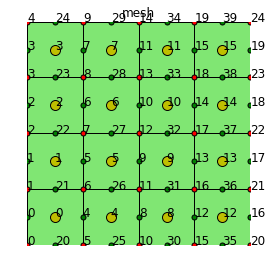

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
box = [0, 1, 0, 1]
n = 4
qmesh = StructureQuadMesh(box, n, n)
fig = plt.figure()
axes = fig.gca()
qmesh.add_plot(axes)
qmesh.find_node(axes, showindex=True, markersize=25, fontsize=12)
qmesh.find_edge(axes, showindex=True, markersize=25, fontsize=12)
qmesh.find_cell(axes, showindex=True, markersize=100, fontsize=12)
axes.set_title('mesh')
plt.show()

除了上述两个基本数组之外, 有限元方法中还需要更多的网格数据, 如:

* 边数组 `edge`
    + 二维 $NE\times 2$ 数组 
    + `edge[i, 0]` 和 `edge[i, 1]` 分别存储第 $i$ 条边的起点和终点的全局编号(即对应 `node` 数组中的行号)
    + 如果第 $i$ 条边是边界边, 则规定从 `edge[i, 0]` 看向 `edge[i, 1]`, 网格离散区域一定在左手边
* 边与单元的相邻关系数组 `edge2cell`
    + 二维 $NE \times 4 $ 的数组
    + `edge2cell[i, 0]` 和 `edge2cell[i, 1]` 分别存储第 $i$ 条边左右两个单元的全局编号(即对应 `cell` 数组中的行号)
    + `edge2cell[i, 2]` 和 `edge2cell[i, 3]` 分别存储第 $i$ 条边在左右两个单元中的局部编号
    + 如果是边界边, 则
        - `edge2cell[i, 0] = edge2cell[i, 1]` 
        - `edge2cell[i, 2] = edge2cell[i, 3]`
        
**注: `edge` 和 `edge2cell` 可以从 `cell` 中构造出来.**

In [20]:
qmesh.node

array([[0.  , 0.  ],
       [0.  , 0.25],
       [0.  , 0.5 ],
       [0.  , 0.75],
       [0.  , 1.  ],
       [0.25, 0.  ],
       [0.25, 0.25],
       [0.25, 0.5 ],
       [0.25, 0.75],
       [0.25, 1.  ],
       [0.5 , 0.  ],
       [0.5 , 0.25],
       [0.5 , 0.5 ],
       [0.5 , 0.75],
       [0.5 , 1.  ],
       [0.75, 0.  ],
       [0.75, 0.25],
       [0.75, 0.5 ],
       [0.75, 0.75],
       [0.75, 1.  ],
       [1.  , 0.  ],
       [1.  , 0.25],
       [1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ]])

In [26]:
tmesh = qmesh.ds

In [27]:
tmesh.cell

array([[ 0,  5,  6,  1],
       [ 1,  6,  7,  2],
       [ 2,  7,  8,  3],
       [ 3,  8,  9,  4],
       [ 5, 10, 11,  6],
       [ 6, 11, 12,  7],
       [ 7, 12, 13,  8],
       [ 8, 13, 14,  9],
       [10, 15, 16, 11],
       [11, 16, 17, 12],
       [12, 17, 18, 13],
       [13, 18, 19, 14],
       [15, 20, 21, 16],
       [16, 21, 22, 17],
       [17, 22, 23, 18],
       [18, 23, 24, 19]], dtype=int32)

In [28]:
tmesh.edge2cell

array([[ 0,  0,  3,  3],
       [ 1,  1,  3,  3],
       [ 2,  2,  3,  3],
       [ 3,  3,  3,  3],
       [ 0,  4,  1,  3],
       [ 1,  5,  1,  3],
       [ 2,  6,  1,  3],
       [ 3,  7,  1,  3],
       [ 4,  8,  1,  3],
       [ 5,  9,  1,  3],
       [ 6, 10,  1,  3],
       [ 7, 11,  1,  3],
       [ 8, 12,  1,  3],
       [ 9, 13,  1,  3],
       [10, 14,  1,  3],
       [11, 15,  1,  3],
       [12, 12,  1,  1],
       [13, 13,  1,  1],
       [14, 14,  1,  1],
       [15, 15,  1,  1],
       [ 0,  0,  0,  0],
       [ 1,  0,  0,  2],
       [ 2,  1,  0,  2],
       [ 3,  2,  0,  2],
       [ 3,  3,  2,  2],
       [ 4,  4,  0,  0],
       [ 5,  4,  0,  2],
       [ 6,  5,  0,  2],
       [ 7,  6,  0,  2],
       [ 7,  7,  2,  2],
       [ 8,  8,  0,  0],
       [ 9,  8,  0,  2],
       [10,  9,  0,  2],
       [11, 10,  0,  2],
       [11, 11,  2,  2],
       [12, 12,  0,  0],
       [13, 12,  0,  2],
       [14, 13,  0,  2],
       [15, 14,  0,  2],
       [15, 15,  2,  2]],

In [31]:
tmesh.cell_to_edge()

array([[20,  4, 21,  0],
       [21,  5, 22,  1],
       [22,  6, 23,  2],
       [23,  7, 24,  3],
       [25,  8, 26,  4],
       [26,  9, 27,  5],
       [27, 10, 28,  6],
       [28, 11, 29,  7],
       [30, 12, 31,  8],
       [31, 13, 32,  9],
       [32, 14, 33, 10],
       [33, 15, 34, 11],
       [35, 16, 36, 12],
       [36, 17, 37, 13],
       [37, 18, 38, 14],
       [38, 19, 39, 15]], dtype=int32)

In [34]:
tmesh.cell_to_cell()

array([[ 0,  4,  1,  0],
       [ 0,  5,  2,  1],
       [ 1,  6,  3,  2],
       [ 2,  7,  3,  3],
       [ 4,  8,  5,  0],
       [ 4,  9,  6,  1],
       [ 5, 10,  7,  2],
       [ 6, 11,  7,  3],
       [ 8, 12,  9,  4],
       [ 8, 13, 10,  5],
       [ 9, 14, 11,  6],
       [10, 15, 11,  7],
       [12, 12, 13,  8],
       [12, 13, 14,  9],
       [13, 14, 15, 10],
       [14, 15, 15, 11]])

In [35]:
tmesh.boundary_edge_index()

array([ 0,  1,  2,  3, 16, 17, 18, 19, 20, 24, 25, 29, 30, 34, 35, 39])

In [21]:
qmesh.print()

Point:
 [[0.   0.  ]
 [0.   0.25]
 [0.   0.5 ]
 [0.   0.75]
 [0.   1.  ]
 [0.25 0.  ]
 [0.25 0.25]
 [0.25 0.5 ]
 [0.25 0.75]
 [0.25 1.  ]
 [0.5  0.  ]
 [0.5  0.25]
 [0.5  0.5 ]
 [0.5  0.75]
 [0.5  1.  ]
 [0.75 0.  ]
 [0.75 0.25]
 [0.75 0.5 ]
 [0.75 0.75]
 [0.75 1.  ]
 [1.   0.  ]
 [1.   0.25]
 [1.   0.5 ]
 [1.   0.75]
 [1.   1.  ]]
Cell:
 [[ 0  5  6  1]
 [ 1  6  7  2]
 [ 2  7  8  3]
 [ 3  8  9  4]
 [ 5 10 11  6]
 [ 6 11 12  7]
 [ 7 12 13  8]
 [ 8 13 14  9]
 [10 15 16 11]
 [11 16 17 12]
 [12 17 18 13]
 [13 18 19 14]
 [15 20 21 16]
 [16 21 22 17]
 [17 22 23 18]
 [18 23 24 19]]
Edge and Edge2cell:
 [[ 1  0  0  0  3  3]
 [ 2  1  1  1  3  3]
 [ 3  2  2  2  3  3]
 [ 4  3  3  3  3  3]
 [ 5  6  0  4  1  3]
 [ 6  7  1  5  1  3]
 [ 7  8  2  6  1  3]
 [ 8  9  3  7  1  3]
 [10 11  4  8  1  3]
 [11 12  5  9  1  3]
 [12 13  6 10  1  3]
 [13 14  7 11  1  3]
 [15 16  8 12  1  3]
 [16 17  9 13  1  3]
 [17 18 10 14  1  3]
 [18 19 11 15  1  3]
 [20 21 12 12  1  1]
 [21 22 13 13  1  1]
 [22 23 14 14  1  1